In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
f = open(os.path.expanduser("~/repos/CIP-square-data/cipTransactions.csv"))
cipTransactions = pd.read_csv(f)
cipTransactions

,Date,Time,Gross Sales,Net Sales,Tax,Total Collected,Card,Card Entry Methods,Cash,Fees,...,Description,Event Type,Customer ID,Customer Name,Deposit ID,Deposit Date,Deposit Details,Fee Percentage Rate,Fee Fixed Rate,Refund Reason
0,7/29/22,20:45:33,$10.00,$10.00,$0.00,$10.00,$0.00,NaN,$10.00,$0.00,...,Prem-Cash (Regular),Payment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/29/22,20:44:11,$36.00,$36.00,$0.00,$36.00,$0.00,NaN,$36.00,$0.00,...,3 x Cocktail - CASH (Regular),Payment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/29/22,20:42:49,$12.00,$12.00,$0.00,$12.00,$0.00,NaN,$12.00,$0.00,...,Cocktail - CASH (Regular),Payment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7/29/22,20:42:35,$12.00,$12.00,$0.00,$12.00,$0.00,NaN,$12.00,$0.00,...,2 x Dom-Cash (Regular),Payment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7/29/22,20:42:09,$20.00,$20.00,$1.75,$21.75,$21.75,Tapped,$0.00,($0.67),...,2 x Prem - Credit (Regular),Payment,NaN,NaN,3ZZQ0XFN8H848YVE9YBY12E3434N,7/31/22,https://squareup.com/dashboard/sales/deposits/...,2.6,$0.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14424,5/6/22,15:45:42,$0.00,$0.00,$0.00,$0.00,$0.00,NaN,$0.00,$0.00,...,NaN,Payment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14425,5/6/22,15:45:38,$0.00,$0.00,$0.00,$0.00,$0.00,NaN,$0.00,$0.00,...,NaN,Payment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14426,5/6/22,15:45:32,$0.00,$0.00,$0.00,$0.00,$0.00,NaN,$0.00,$0.00,...,NaN,Payment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14427,5/4/22,16:12:10,($3.00),($3.00),$0.00,($3.00),($3.00),Tapped,$0.00,$0.18,...,Water (Regular Price),Refund,NaN,NaN,3Z2FWX6E6C448YS4K3BY12E3434N,5/4/22,https://squareup.com/dashboard/sales/deposits/...,2.6,$0.10,Canceled order


In [3]:
cipTransactions.columns.values

array(['Date', 'Time', 'Gross Sales', 'Net Sales', 'Tax',
       'Total Collected', 'Card', 'Card Entry Methods', 'Cash', 'Fees',
       'Net Total', 'Transaction ID', 'Payment ID', 'Card Brand',
       'PAN Suffix', 'Device Name', 'Staff Name', 'Staff ID', 'Details',
       'Description', 'Event Type', 'Customer ID', 'Customer Name',
       'Deposit ID', 'Deposit Date', 'Deposit Details',
       'Fee Percentage Rate', 'Fee Fixed Rate', 'Refund Reason'],
      dtype=object)

In [4]:
type(cipTransactions.Date)

pandas.core.series.Series

In [5]:
from datetime import datetime
excel_date = cipTransactions[['Transaction ID', 'Date', 'Time', 'Gross Sales', 'Description']]
excel_date = excel_date[::-1]
#excel_date = excel_date.sort_values(['Date', 'Time'])

In [6]:
excel_date['Hour'] = excel_date.Time.apply(lambda x: (int(x[0:2])-12))
excel_date

,Transaction ID,Date,Time,Gross Sales,Description,Hour
14428,5rNEr30XaA6Ns3HxGaLC0aveV,5/4/22,16:11:50,($23.00),"Water (Regular Price), Dom-Cash (Regular), Coc...",4
14427,r2SwmR5Z9mtG7vq1u1gfci3eV,5/4/22,16:12:10,($3.00),Water (Regular Price),4
14426,XIEuqeQVgLjxrxNnN9b1EqreV,5/6/22,15:45:32,$0.00,NaN,3
14425,PivCP1LIirPjmpr96GSWL2teV,5/6/22,15:45:38,$0.00,NaN,3
14424,xZgDMFlqtyvpC4nATcGS6ApeV,5/6/22,15:45:42,$0.00,NaN,3
...,...,...,...,...,...,...
4,VRMJBjP7WhKGiDURaWvG6XkeV,7/29/22,20:42:09,$20.00,2 x Prem - Credit (Regular),8
3,phlSmw4f5inAAU8GSs8CDm7eV,7/29/22,20:42:35,$12.00,2 x Dom-Cash (Regular),8
2,JZHrDUugVAm76wpsGvxEkz7eV,7/29/22,20:42:49,$12.00,Cocktail - CASH (Regular),8
1,viwCFHKS9IPUdWwoJs54nT4eV,7/29/22,20:44:11,$36.00,3 x Cocktail - CASH (Regular),8


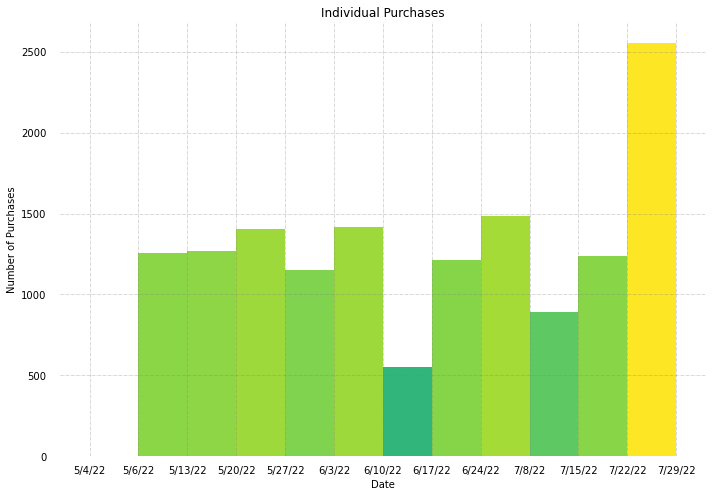

In [7]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(1,1, figsize = (10, 7), tight_layout = True)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
 
# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

N, bins, patches = axs.hist(excel_date['Date'], bins = 12)

fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Date")
plt.ylabel("Number of Purchases")
plt.title('Individual Purchases')
 
# Show plot
plt.show()

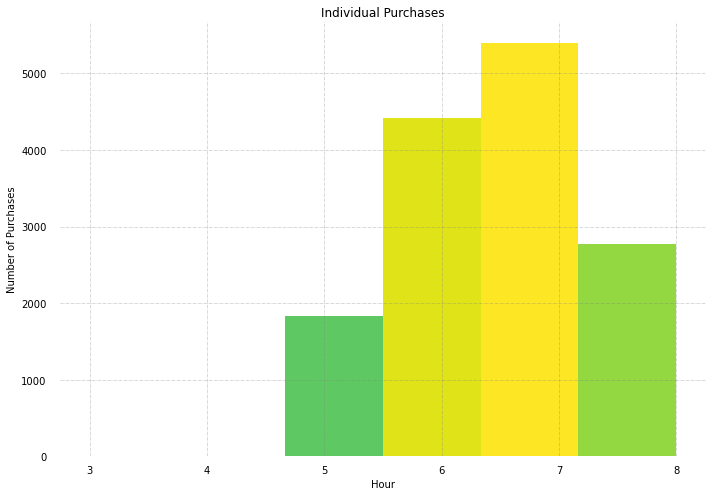

In [8]:
fig, axs = plt.subplots(1,1, figsize = (10, 7), tight_layout = True)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
 
# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

N, bins, patches = axs.hist(excel_date['Hour'], bins = 6)

fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Hour")
plt.ylabel("Number of Purchases")
plt.title('Individual Purchases')
 
# Show plot
plt.show()

In [9]:
excel_date.Description.unique()

array(['Water (Regular Price), Dom-Cash (Regular), Cocktail - CASH (Regular)',
       'Water (Regular Price)', nan,
       '3 x Cocktail - CASH (Regular), 3 x Prem-Cash (Regular)',
       '2 x Dom-Cash (Regular), Cocktail - CASH (Regular)',
       'Water (Regular Price), Prem-Cash (Regular)',
       '4 x Dom-Cash (Regular)', '2 x Dom-Cash (Regular)',
       '2 x Prem-Cash (Regular)',
       '2 x Prem-Cash (Regular), 2 x Dom-Cash (Regular)',
       '3 x Prem-Cash (Regular)',
       'Water (Regular Price), 2 x Prem-Cash (Regular), Water (Regular Price), Dom-Cash (Regular)',
       '4 x Prem-Cash (Regular)',
       'Water (Regular Price), 4 x Prem-Cash (Regular), 2 x Water (Regular Price)',
       '5 x Dom-Cash (Regular)',
       '2 x Prem-Cash (Regular), 2 x Dom-Cash (Regular), 2 x Water (Regular Price)',
       '6 x Dom-Cash (Regular)', 'Dom-Cash (Regular)',
       '6 x Prem-Cash (Regular)',
       '3 x Prem-Cash (Regular), 2 x Dom-Cash (Regular)',
       '15 x Dom-Cash (Regular)',
    

In [10]:
excel_date = excel_date.iloc[::-1]
excel_date

,Transaction ID,Date,Time,Gross Sales,Description,Hour
0,HWQa2vjqPhIHeMFGQBUI08xeV,7/29/22,20:45:33,$10.00,Prem-Cash (Regular),8
1,viwCFHKS9IPUdWwoJs54nT4eV,7/29/22,20:44:11,$36.00,3 x Cocktail - CASH (Regular),8
2,JZHrDUugVAm76wpsGvxEkz7eV,7/29/22,20:42:49,$12.00,Cocktail - CASH (Regular),8
3,phlSmw4f5inAAU8GSs8CDm7eV,7/29/22,20:42:35,$12.00,2 x Dom-Cash (Regular),8
4,VRMJBjP7WhKGiDURaWvG6XkeV,7/29/22,20:42:09,$20.00,2 x Prem - Credit (Regular),8
...,...,...,...,...,...,...
14424,xZgDMFlqtyvpC4nATcGS6ApeV,5/6/22,15:45:42,$0.00,NaN,3
14425,PivCP1LIirPjmpr96GSWL2teV,5/6/22,15:45:38,$0.00,NaN,3
14426,XIEuqeQVgLjxrxNnN9b1EqreV,5/6/22,15:45:32,$0.00,NaN,3
14427,r2SwmR5Z9mtG7vq1u1gfci3eV,5/4/22,16:12:10,($3.00),Water (Regular Price),4


In [11]:
excel_date = excel_date.dropna(subset= ['Description'])

In [12]:
excel_date

,Transaction ID,Date,Time,Gross Sales,Description,Hour
0,HWQa2vjqPhIHeMFGQBUI08xeV,7/29/22,20:45:33,$10.00,Prem-Cash (Regular),8
1,viwCFHKS9IPUdWwoJs54nT4eV,7/29/22,20:44:11,$36.00,3 x Cocktail - CASH (Regular),8
2,JZHrDUugVAm76wpsGvxEkz7eV,7/29/22,20:42:49,$12.00,Cocktail - CASH (Regular),8
3,phlSmw4f5inAAU8GSs8CDm7eV,7/29/22,20:42:35,$12.00,2 x Dom-Cash (Regular),8
4,VRMJBjP7WhKGiDURaWvG6XkeV,7/29/22,20:42:09,$20.00,2 x Prem - Credit (Regular),8
...,...,...,...,...,...,...
14420,9dL7F3Q4CtDc8uInQUkmeameV,5/6/22,17:07:39,$13.00,"Water (Regular Price), Prem-Cash (Regular)",5
14421,FPCRYRwNI4G5rs0rJjsrl26eV,5/6/22,17:06:12,$28.00,"2 x Dom-Cash (Regular), Cocktail - CASH (Regular)",5
14422,nEGcBnEVnnAl5iuvdGfd7B6eV,5/6/22,17:05:20,$66.00,"3 x Cocktail - CASH (Regular), 3 x Prem-Cash (...",5
14427,r2SwmR5Z9mtG7vq1u1gfci3eV,5/4/22,16:12:10,($3.00),Water (Regular Price),4


In [27]:
hourDesc = excel_date[['Hour', 'Description']]
hourDesc

,Hour,Description
0,8,Prem-Cash (Regular)
1,8,3 x Cocktail - CASH (Regular)
2,8,Cocktail - CASH (Regular)
3,8,2 x Dom-Cash (Regular)
4,8,2 x Prem - Credit (Regular)
...,...,...
14420,5,"Water (Regular Price), Prem-Cash (Regular)"
14421,5,"2 x Dom-Cash (Regular), Cocktail - CASH (Regular)"
14422,5,"3 x Cocktail - CASH (Regular), 3 x Prem-Cash (..."
14427,4,Water (Regular Price)


In [90]:
splitDesc = [x.split(', ') for x in hourDesc['Description']]

for i in range(len(splitDesc)):
    temp = []
    if len(splitDesc[i]) > 1:
        for j in range(len(splitDesc[i])):
            temp.append(splitDesc[i][j].split('-')[0])
        splitDesc[i] = temp
    else:
        for j in range(len(splitDesc[i])):
            splitDesc[i] = splitDesc[i][j].split('-')[0]
hourDesc['cln1'] = splitDesc
hourDesc

<ipython-input-90-9373c6f923f9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourDesc['cln1'] = splitDesc


,Hour,Description,cln1
0,8,Prem-Cash (Regular),Prem
1,8,3 x Cocktail - CASH (Regular),3 x Cocktail
2,8,Cocktail - CASH (Regular),Cocktail
3,8,2 x Dom-Cash (Regular),2 x Dom
4,8,2 x Prem - Credit (Regular),2 x Prem
...,...,...,...
14420,5,"Water (Regular Price), Prem-Cash (Regular)","[Water (Regular Price), Prem]"
14421,5,"2 x Dom-Cash (Regular), Cocktail - CASH (Regular)","[2 x Dom, Cocktail ]"
14422,5,"3 x Cocktail - CASH (Regular), 3 x Prem-Cash (...","[3 x Cocktail , 3 x Prem]"
14427,4,Water (Regular Price),Water (Regular Price)


In [125]:
cocktail = []
premium = []
domestic = []
water = []

In [126]:
splitDesc

['Prem',
 '3 x Cocktail ',
 'Cocktail ',
 '2 x Dom',
 '2 x Prem ',
 'Prem ',
 'Dom ',
 ['Prem ', '2 x Dom '],
 '2 x Cocktail ',
 'Prem',
 'Prem ',
 '2 x Prem ',
 ['2 x Cocktail ', '2 x Prem '],
 'Dom',
 '2 x Dom',
 'Cocktail ',
 'Cocktail ',
 '8 x Prem ',
 '3 x Dom',
 'Cocktail ',
 'Cocktail ',
 ['Cocktail ', 'Prem ', 'Water (Regular Price)'],
 'Cocktail ',
 '2 x Cocktail ',
 'Prem ',
 'Prem ',
 'Prem ',
 'Cocktail ',
 '2 x Cocktail ',
 ['Dom ', 'Prem '],
 'Prem ',
 '8 x Cocktail ',
 ['Cocktail ', 'Prem'],
 'Prem ',
 'Prem ',
 '4 x Prem ',
 'Cocktail ',
 'Prem ',
 '2 x Dom ',
 'Prem',
 'Dom ',
 ['2 x Cocktail ', 'Dom '],
 '2 x Dom ',
 ['Prem', '3 x Dom'],
 'Cocktail ',
 'Prem ',
 'Dom',
 'Dom ',
 '2 x Dom',
 'Prem',
 'Dom',
 'Prem ',
 '2 x Prem ',
 'Dom ',
 '2 x Dom ',
 '2 x Dom ',
 'Cocktail ',
 ['Cocktail ', 'Prem '],
 'Dom',
 'Prem ',
 '2 x Prem',
 'Cocktail ',
 'Cocktail ',
 '2 x Prem',
 'Prem ',
 'Dom ',
 'Dom ',
 '2 x Cocktail ',
 'Water (Regular Price)',
 'Prem ',
 'Prem ',
 '2 

In [112]:
hourDesc['cln1'].iloc[2].strip()
hourDesc['cln1'].iloc[2][-8:]

'ocktail '

In [115]:
for i in range(len(splitDesc)):
    if len(splitDesc[i]) > 1:
        for j in range(len(splitDesc[i])):
            if splitDesc[i][0].isnumeric() == True:
                splitDesc[i][j].strip()
                if splitDesc[i][j][-8:] == 'Cocktail':
                    c = splitDesc[i][j][0]
                    p = 0
                    d = 0
                    w = 0
                elif splitDesc[i][j][-4:] == "Prem":
                    c = 0
                    p = splitDesc[i][0]
                    d = 0
                    w = 0
                elif splitDesc[i][j][-3:] == 'Dom':
                    c = 0
                    p = 0
                    d = splitDesc[i][j][0]
                    w = 0
                else:
                    c = 0
                    p = 0
                    d = 0
                    w = splitDesc[i][j][0]
                cocktail.append(c)
                premium.append(p)
                domestic.append(d)
                water.append(w) 
            else:
                splitDesc[i][j].strip()
                if splitDesc[i][j][-8:] == 'Cocktail':
                    c = 1
                    p = 0
                    d = 0
                    w = 0
                elif splitDesc[i][j][-4:] == "Prem":
                    c = 0
                    p = 1
                    d = 0
                    w = 0
                elif splitDesc[i][j][-3:] == 'Dom':
                    c = 0
                    p = 0
                    d = 1
                    w = 0
                else:
                    c = 0
                    p = 0
                    d = 0
                    w = 1
                cocktail.append(c)
                premium.append(p)
                domestic.append(d)
                water.append(w)
    else:
        if splitDesc[i][0].isnumeric() == True:
            splitDesc[i].strip()
            if splitDesc[i][-8:] == 'Cocktail':
                c = splitDesc[i][0]
                p = 0
                d = 0
                w = 0
            elif splitDesc[i][-4:] == "Prem":
                c = 0
                p = splitDesc[i][0]
                d = 0
                w = 0
            elif splitDesc[i][-3:] == 'Dom':
                c = 0
                p = 0
                d = splitDesc[i][0]
                w = 0
            else:
                c = 0
                p = 0
                d = 0
                w = splitDesc[i][0]
            cocktail.append(c)
            premium.append(p)
            domestic.append(d)
            water.append(w) 
        else:
            splitDesc[i].strip()
            if splitDesc[i][-8:] == 'Cocktail':
                c = 1
                p = 0
                d = 0
                w = 0
            elif splitDesc[i][-4:] == "Prem":
                c = 0
                p = 1
                d = 0
                w = 0
            elif splitDesc[i][-3:] == 'Dom':
                c = 0
                p = 0
                d = 1
                w = 0
            else:
                c = 0
                p = 0
                d = 0
                w = 1
            cocktail.append(c)
            premium.append(p)
            domestic.append(d)
            water.append(w)
      

In [116]:
water

[1,
 1,
 1,
 1,
 '3',
 ' ',
 'x',
 ' ',
 'C',
 'o',
 'c',
 'k',
 't',
 'a',
 'i',
 'l',
 ' ',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '2',
 ' ',
 'x',
 ' ',
 'D',
 'o',
 'm',
 '2',
 ' ',
 'x',
 ' ',
 'P',
 'r',
 'e',
 'm',
 ' ',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '2',
 ' ',
 'x',
 ' ',
 'C',
 'o',
 'c',
 'k',
 't',
 'a',
 'i',
 'l',
 ' ',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '2',
 ' ',
 'x',
 ' ',
 'P',
 'r',
 'e',
 'm',
 ' ',
 1,
 1,
 1,
 1,
 1,
 '2',
 ' ',
 'x',
 ' ',
 'D',
 'o',
 'm',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '8',
 ' ',
 'x',
 ' ',
 'P',
 'r',
 'e',
 'm',
 ' ',
 '3',
 ' ',
 'x',
 ' ',
 'D',
 'o',
 'm',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '2',
 ' ',
 'x',
 ' ',
 'C',
 'o',
 'c',
 'k',
 't',
 'a',
 'i',
 'l',
 ' ',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '2',
 ' ',
 'x',
 ' ',
 'C',
 'o',
 '

In [123]:
for i in range(len(splitDesc)):
    if len(splitDesc[i]) > 1:
        for j in range(len(splitDesc[i])):
            if splitDesc[i][j][0].isnumeric() == True:
                noSpace = splitDesc[i][j].strip()
                if noSpace[-8:] == 'Cocktail':
                    c = int(noSpace[0])
                    p = 0
                    d = 0
                    w = 0
                elif noSpace[-4:] == "Prem":
                    c = 0
                    p = int(noSpace[0])
                    d = 0
                    w = 0
                elif noSpace[-3:] == 'Dom':
                    c = 0
                    p = 0
                    d = int(noSpace[0])
                    w = 0
                else:
                    c = 0
                    p = 0
                    d = 0
                    w = int(noSpace[0])
                cocktail.append(c)
                premium.append(p)
                domestic.append(d)
                water.append(w) 
            else:
                noSpace = splitDesc[i][j].strip()
                if noSpace[-8:] == 'Cocktail':
                    c = 1
                    p = 0
                    d = 0
                    w = 0
                elif noSpace[-4:] == "Prem":
                    c = 0
                    p = 1
                    d = 0
                    w = 0
                elif noSpace[-3:] == 'Dom':
                    c = 0
                    p = 0
                    d = 1
                    w = 0
                else:
                    c = 0
                    p = 0
                    d = 0
                    w = 1
                cocktail.append(c)
                premium.append(p)
                domestic.append(d)
                water.append(w)
    else:
        if splitDesc[i][j][0].isnumeric() == True:
            noSpace = splitDesc[i].strip()
            if noSpace[-8:] == 'Cocktail':
                c = int(noSpace[0])
                p = 0
                d = 0
                w = 0
            elif noSpace[-4:] == "Prem":
                c = 0
                p = int(noSpace[0])
                d = 0
                w = 0
            elif noSpace[-3:] == 'Dom':
                c = 0
                p = 0
                d = int(noSpace[0])
                w = 0
            else:
                c = 0
                p = 0
                d = 0
                w = noSpace[0]
            cocktail.append(c)
            premium.append(p)
            domestic.append(d)
            water.append(w) 
        else:
            noSpace.strip()
            if noSpace[-8:] == 'Cocktail':
                c = 1
                p = 0
                d = 0
                w = 0
            elif noSpace[-4:] == "Prem":
                c = 0
                p = 1
                d = 0
                w = 0
            elif noSpace[-3:] == 'Dom':
                c = 0
                p = 0
                d = 1
                w = 0
            else:
                c = 0
                p = 0
                d = 0
                w = 1
            cocktail.append(c)
            premium.append(p)
            domestic.append(d)
            water.append(w)

In [124]:
water

[1,
 1,
 1,
 1,
 '3',
 ' ',
 'x',
 ' ',
 'C',
 'o',
 'c',
 'k',
 't',
 'a',
 'i',
 'l',
 ' ',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '2',
 ' ',
 'x',
 ' ',
 'D',
 'o',
 'm',
 '2',
 ' ',
 'x',
 ' ',
 'P',
 'r',
 'e',
 'm',
 ' ',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '2',
 ' ',
 'x',
 ' ',
 'C',
 'o',
 'c',
 'k',
 't',
 'a',
 'i',
 'l',
 ' ',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '2',
 ' ',
 'x',
 ' ',
 'P',
 'r',
 'e',
 'm',
 ' ',
 1,
 1,
 1,
 1,
 1,
 '2',
 ' ',
 'x',
 ' ',
 'D',
 'o',
 'm',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '8',
 ' ',
 'x',
 ' ',
 'P',
 'r',
 'e',
 'm',
 ' ',
 '3',
 ' ',
 'x',
 ' ',
 'D',
 'o',
 'm',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '2',
 ' ',
 'x',
 ' ',
 'C',
 'o',
 'c',
 'k',
 't',
 'a',
 'i',
 'l',
 ' ',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '2',
 ' ',
 'x',
 ' ',
 'C',
 'o',
 '

In [91]:
df1 = hourDesc
df2 = df1.reset_index().explode('cln1')
new_df = pd.crosstab(df2['Hour'], df2['cln1'])
new_df

cln1,10 x Cocktail,10 x Dom,10 x Dom,10 x Prem,10 x Prem,12 x Cocktail,12 x Dom,12 x Prem,12 x Prem,15 x Dom,...,9 x Dom,9 x Dom,9 x Prem,Cocktail,Custom Amount,Dom,Dom,Prem,Prem,Water (Regular Price)
Hour,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2
5,1,1,1,0,2,0,0,0,1,1,...,0,0,0,258,0,112,121,132,152,140
6,0,2,2,0,5,1,1,1,0,0,...,1,1,0,701,0,306,314,347,492,366
7,1,3,5,6,2,1,0,0,0,0,...,0,0,0,826,1,360,444,399,655,406
8,0,1,0,1,1,0,0,0,0,0,...,0,0,1,457,0,254,276,272,357,155
